In [213]:
#import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

## Getting Data

In [214]:
#import twitter archive

twitter_archive_dirty = pd.read_csv('twitter-archive-enhanced.csv')

twitter_ids = twitter_archive_dirty.tweet_id.values


In [215]:
#Request image predictions
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [216]:
# Read in tsv file as a Pandas DataFrame    
image_predictions_dirty = pd.read_csv('image_predictions.tsv', sep='\t')

In [217]:
#twitter api

consumer_key = 'NOTHING TO SEE HERE'
consumer_secret = 'NOTHING TO SEE HERE'
access_token = 'NOTHING TO SEE HERE'
access_secret = 'NOTHING TO SEE HERE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True )

In [218]:
start = time.time()
print("hello")


hello


### Resources

https://stackoverflow.com/questions/47253543/how-to-collect-tweets-in-a-json-file-on-twitter-using-python

https://stackoverflow.com/questions/49986251/how-to-access-tweet-text-in-a-json-file-to-perform-further-analysis

In [219]:
# # Commenting out because i don't want this to run more than once


# with open('tweet_json.txt', 'a', encoding='utf8') as f:
#     for tweet_id in twitter_archive['tweet_id']:
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             json.dump(tweet._json, f)
#             f.write('\n')
#         except:
#             continue



In [220]:
end = time.time()
print(end - start)


0.039999961853027344


In [221]:
with open('tweet_json.txt') as h:
    tdata = pd.DataFrame(json.loads(line) for line in h)

In [222]:
final_td_dirty = tdata.filter(['id','favorite_count','retweet_count'],axis=1)


## Assessing Twitter Archive Data

In [223]:
#Re-check our 3 datasets
twitter_archive_dirty.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [224]:
image_predictions_dirty.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [225]:
final_td_dirty.head()

,id,favorite_count,retweet_count
0,892420643555336193,38845,8605
1,892177421306343426,33274,6322
2,891815181378084864,25072,4193
3,891689557279858688,42230,8718
4,891327558926688256,40371,9488


### Examine Twitter Archive Data

In [226]:
#copy dataframe
twitter_archive = twitter_archive_dirty.copy()

In [227]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [228]:
#check na values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Modify datatypes

In [229]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [230]:
#Change timestamp to  datetime
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

In [231]:
#Check data types
twitter_archive.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Checking values

#### Check unique values of each dog stage
Checking to make sure there are no duplicate values here

In [232]:
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [233]:
twitter_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [234]:
twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [235]:
twitter_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [236]:
#Check if there are any duplicate tweet ids
sum(twitter_archive.duplicated('tweet_id'))

0

In [237]:
#Check min/max numerators and denominators
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [238]:
twitter_archive.rating_numerator.median()

11.0

We'll have to examine the data and find the record that has 1776 as the numerator

In [239]:
#widen to see full text
pd.options.display.max_colwidth=1000


In [240]:
twitter_archive[twitter_archive['rating_numerator'] >1000].text

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object

In [241]:
twitter_archive[twitter_archive['rating_numerator'] >100]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,None,None,None,None


In [242]:
#check unique rating_numerator values
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are very few rows with rating_numerators greater than 100

In [243]:
#check denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Most rating denominators have a value of 10. I will drop the 0 value. Let's check the text to make sure these other ones are valid

In [244]:
twitter_archive[twitter_archive['rating_denominator'] >10].text

342                                                                                                               @docmisterio account started on 11/15/15
433                                                    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
784           RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068          After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120                             Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165                                                                  

In [245]:
#Checking to see if this 0 is really valid
twitter_archive[twitter_archive['rating_denominator'] ==0].text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

There are a few ratings that will have to be corrected here. Some values were captured as ratings, but they are not. They reference 9/11, 4/20, 7/11 (store location).

In [246]:
#check which columns have null data
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

We can see here that there are some tweets that are actually RTs.  We will exclude tweets that are RTs from our dataset

In [247]:
#looking at RTs
twitter_archive[twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_r

In [248]:
twitter_archive[twitter_archive['retweeted_status_id'].notnull()].count()

tweet_id                      181
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

181 RTs

In [249]:
#Check unique values in other columns
twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [250]:
#Change name values to all uppercase
twitter_archive['name'] = twitter_archive_dirty.name.str.upper()

In [251]:
#unique names
twitter_archive.name.nunique()

957

In [252]:
twitter_archive.name.unique()

array(['PHINEAS', 'TILLY', 'ARCHIE', 'DARLA', 'FRANKLIN', 'NONE', 'JAX',
       'ZOEY', 'CASSIE', 'KODA', 'BRUNO', 'TED', 'STUART', 'OLIVER', 'JIM',
       'ZEKE', 'RALPHUS', 'CANELA', 'GERALD', 'JEFFREY', 'SUCH', 'MAYA',
       'MINGUS', 'DEREK', 'ROSCOE', 'WAFFLES', 'JIMBO', 'MAISEY', 'LILLY',
       'EARL', 'LOLA', 'KEVIN', 'YOGI', 'NOAH', 'BELLA', 'GRIZZWALD',
       'RUSTY', 'GUS', 'STANLEY', 'ALFY', 'KOKO', 'REY', 'GARY', 'A',
       'ELLIOT', 'LOUIS', 'JESSE', 'ROMEO', 'BAILEY', 'DUDDLES', 'JACK',
       'EMMY', 'STEVEN', 'BEAU', 'SNOOPY', 'SHADOW', 'TERRANCE', 'AJA',
       'PENNY', 'DANTE', 'NELLY', 'GINGER', 'BENEDICT', 'VENTI', 'GOOSE',
       'NUGGET', 'CASH', 'COCO', 'JED', 'SEBASTIAN', 'WALTER', 'SIERRA',
       'MONKEY', 'HARRY', 'KODY', 'LASSIE', 'ROVER', 'NAPOLEAN', 'DAWN',
       'BOOMER', 'CODY', 'RUMBLE', 'CLIFFORD', 'QUITE', 'DEWEY', 'SCOUT',
       'GIZMO', 'COOPER', 'HAROLD', 'SHIKHA', 'JAMESY', 'LILI', 'SAMMY',
       'MEATBALL', 'PAISLEY', 'ALBUS', 'NEPTUNE', '

I'm going to look at names that are only 1 character long

In [253]:
#Examine the names of 
twitter_archive[twitter_archive['name'].str.len() < 2]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,A,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,A,None,None,None,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,A,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,A,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,A,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,A,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,A,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 http

I will remove these rows from the dataset in the cleanup section. None of these are valid names.

In [254]:
#check for missing data
twitter_archive.name.isnull().sum()

0

## Cleaning Twitter Archive Data

In [255]:
#remove tweets that are RT, keeps originals
df_new = twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

In [256]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

In [257]:
# # Create a set of dummy variables from the source variable
# archclean_source = pd.get_dummies(clean_twitter_archive['source'])

In [258]:
# #rename columns 
# archclean_source.columns = ['Web Client', 'iPhone', 'Vine','TweetDeck']
# archclean_source.head()

In [259]:
# # Join the dummy variables to the main dataframe
# df_new = clean_twitter_archive.join(archclean_source)


In [260]:
#Drop unused columns
df_new.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [261]:
#Check for duplicate rows
df_new.duplicated().sum()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


In [262]:
#Cleanup bad data
#Cleanup rows that have a denominator greater than 10 and are not actual ratings
df_new[df_new['rating_denominator']> 10].text

342                                                                                                               @docmisterio account started on 11/15/15
433                                                    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068          After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120                             Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165                                                                                      Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202                                 This is Bluebert. He just saw tha

In [263]:
#Rows to delete

df_new.drop(342, inplace=True)
df_new.drop(1598, inplace=True)

df_new[df_new['rating_denominator']> 10].text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


433                                                    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068          After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120                             Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165                                                                                      Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202                                 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228                                                         Happy Sat

In [264]:
#Fix bad data
print("\nUpdate ratings")
df_new.loc[1068, 'rating_numerator'] = 14
df_new.loc[1068, 'rating_denominator'] = 10

df_new.loc[1662, 'rating_numerator'] = 10
df_new.loc[1662, 'rating_denominator'] = 10

df_new.loc[1165, 'rating_numerator'] = 13
df_new.loc[1165, 'rating_denominator'] = 10

df_new.loc[1202, 'rating_numerator'] = 11
df_new.loc[1202, 'rating_denominator'] = 10


Update ratings


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [265]:
df_new[df_new['rating_denominator']> 10].text

433                                                    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120                             Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1228                                                         Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254                                          Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1351                                                                  

In [266]:
#Check for zero values
df_new[df_new['rating_denominator']==0].text


313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [267]:
#Fix row 313
df_new.loc[313, 'rating_numerator'] = 13
df_new.loc[313, 'rating_denominator'] = 10

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [268]:
#Check for zero values
df_new[df_new['rating_numerator']==0].text


315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

These 0 values are valid.

In [269]:
#fix invalid row found in analysis

df_new[df_new['rating_numerator']==27]
df_new.loc[763, 'rating_numerator'] = 11.27

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Create new rating variable

In [270]:
#Create new rating variable
df_new['rating'] = (df_new['rating_numerator']/df_new['rating_denominator'])*100
df_new['rating'].describe()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count     2173.000000
mean       122.439281
std        424.844037
min          0.000000
25%        100.000000
50%        110.000000
75%        120.000000
max      17760.000000
Name: rating, dtype: float64

#### Clean dog type names

In [271]:
#check dog names less than 4 characters 
df_new[df_new['name'].str.len() < 4].name.unique()

array(['JAX', 'TED', 'JIM', 'GUS', 'REY', 'A', 'AJA', 'JED', 'LEO', 'MAX',
       'AVA', 'ELI', 'ASH', 'NOT', 'MIA', 'ONE', 'IKE', 'MO', 'BO', 'TOM',
       'KEN', 'ALF', 'SKY', 'TYR', 'MOE', 'SAM', 'ITO', 'DOC', 'JAY',
       'MYA', 'O', 'AL', 'LOU', 'MY', 'DEX', 'ACE', 'ZOE', 'BLU', 'HIS',
       'AN', 'MAD', 'ALL', 'SID', 'OLD', 'OLE', 'BOB', 'THE', 'OBI', 'BY',
       'EVY', 'TUG', 'JEB', 'DOT', 'EVE', 'MAC', 'ED', 'TAZ', 'CAL', 'JD',
       'PIP', 'AMY', 'GIN', 'EDD', 'BEN', 'DUG', 'JO', 'RON', 'STU'], dtype=object)

In [272]:
#check dog names less than 6 characters long
df_new[df_new['name'].str.len() < 6].name.unique()

array(['TILLY', 'DARLA', 'NONE', 'JAX', 'ZOEY', 'KODA', 'BRUNO', 'TED',
       'JIM', 'ZEKE', 'SUCH', 'MAYA', 'DEREK', 'JIMBO', 'EARL', 'LOLA',
       'KEVIN', 'YOGI', 'NOAH', 'BELLA', 'RUSTY', 'GUS', 'ALFY', 'KOKO',
       'REY', 'GARY', 'A', 'LOUIS', 'JESSE', 'ROMEO', 'JACK', 'BEAU',
       'EMMY', 'AJA', 'PENNY', 'DANTE', 'NELLY', 'VENTI', 'GOOSE', 'CASH',
       'JED', 'HARRY', 'KODY', 'ROVER', 'CODY', 'DEWEY', 'SCOUT', 'GIZMO',
       'LILI', 'COCO', 'SAMMY', 'ALBUS', 'BELLE', 'QUINN', 'ZOOEY', 'DAVE',
       'BURT', 'CARL', 'JORDY', 'MILKY', 'QUITE', 'WYATT', 'ROSIE', 'THOR',
       'OSCAR', 'ARYA', 'ALICE', 'BENNY', 'ASPEN', 'JAROD', 'IGGY',
       'SNOOP', 'KYLE', 'LEO', 'RILEY', 'NOOSH', 'ODIN', 'JERRY', 'RONTU',
       'DAISY', 'TUCK', 'VIXEN', 'BRADY', 'LUNA', 'MARGO', 'SADIE', 'HANK',
       'TYCHO', 'INDIE', 'MAX', 'DAWN', 'MONTY', 'ODIE', 'ARLO', 'LUCY',
       'CLARK', 'MEERA', 'AVA', 'ELI', 'ASH', 'TOBI', 'POPPY', 'RHINO',
       'NOT', 'ORION', 'EEVEE', 'KUYU', 'DUTCH'

In [273]:
#Remove invalid names from dataframe
clean_twitter_arch = df_new[~df_new.name.isin(['A','AN','THE','BY','MY','NONE'])]

In [274]:
#new dataframe without invalid names
clean_twitter_arch[clean_twitter_arch['name'].str.len() < 4].name.unique()

array(['JAX', 'TED', 'JIM', 'GUS', 'REY', 'AJA', 'JED', 'LEO', 'MAX',
       'AVA', 'ELI', 'ASH', 'NOT', 'MIA', 'ONE', 'IKE', 'MO', 'BO', 'TOM',
       'KEN', 'ALF', 'SKY', 'TYR', 'MOE', 'SAM', 'ITO', 'DOC', 'JAY',
       'MYA', 'O', 'AL', 'LOU', 'DEX', 'ACE', 'ZOE', 'BLU', 'HIS', 'MAD',
       'ALL', 'SID', 'OLD', 'OLE', 'BOB', 'OBI', 'EVY', 'TUG', 'JEB',
       'DOT', 'EVE', 'MAC', 'ED', 'TAZ', 'CAL', 'JD', 'PIP', 'AMY', 'GIN',
       'EDD', 'BEN', 'DUG', 'JO', 'RON', 'STU'], dtype=object)

##### Change dog type values to 0s and 1s 

In [275]:
#Clean dog type values

clean_twitter_arch['puppo'].replace('None', 0,inplace=True)
clean_twitter_arch['puppo'].replace('puppo', 1,inplace=True)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [276]:
clean_twitter_arch[clean_twitter_arch['puppo'].isnull()]

#clean_twitter_arch.drop(1068, inplace=True)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating


In [277]:
#change floofer values
clean_twitter_arch['floofer'].replace('None', 0,inplace=True)
clean_twitter_arch['floofer'].replace('floofer', 1,inplace=True)
print(clean_twitter_arch['floofer'].unique())

#change pupper values
clean_twitter_arch['pupper'].replace('None', 0,inplace=True)
clean_twitter_arch['pupper'].replace('pupper', 1,inplace=True)
print(clean_twitter_arch['pupper'].unique())

#change doggo values
clean_twitter_arch['doggo'].replace('None', 0,inplace=True)
clean_twitter_arch['doggo'].replace('doggo', 1,inplace=True)
print(clean_twitter_arch['doggo'].unique())



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


[0 1]
[0 1]
[0 1]


In [278]:
clean_twitter_arch['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [279]:
clean_twitter_arch['source'] = clean_twitter_arch['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone')
clean_twitter_arch['source'] = clean_twitter_arch['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Web')
clean_twitter_arch['source'] = clean_twitter_arch['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine')
clean_twitter_arch['source'] = clean_twitter_arch['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [280]:
clean_twitter_arch['source'].unique()

array(['iPhone', 'Web', 'Vine', 'TweetDeck'], dtype=object)

In [281]:
#Final Check for twitter arch clean data
clean_twitter_arch.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,PHINEAS,0,0,0,0,130.0
1,892177421306343426,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,TILLY,0,0,0,0,130.0
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,ARCHIE,0,0,0,0,120.0
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,DARLA,0,0,0,0,130.0
4,891327558926688256,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,FRANKLIN,0,0,0,0,120.0


In [282]:
#check for null values
clean_twitter_arch.isnull().any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
rating                False
dtype: bool

In [283]:
clean_twitter_arch.shape

(1424, 13)

## Assess  & Clean image predictions

In [284]:
#make copy
image_predictions = image_predictions_dirty.copy()

In [285]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [286]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [287]:
#check for dupes
image_predictions.duplicated().sum()

0

In [288]:
#check stats for quant variables
image_predictions.jpg_url.duplicated().sum()

66

There are 66 duplicate URLs, but they might be RTs. After I join this to the first dataset, I will check to see if I still see dupes. 

Otherwise, I will not make any other modifications here.


In [289]:
#check for tweets with no images
image_predictions.jpg_url.isnull().any()


False

## Assess & Clean json tweet data

In [290]:
#make copy
final_td = final_td_dirty.copy()

In [291]:
final_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [292]:
#Check for dupes
final_td.duplicated().any()

False

Updating column name

In [293]:
#Change column name
final_td.rename(columns={'id':'tweet_id'}, inplace=True)

## Merge datasets

In [294]:
print(list(clean_twitter_arch)[0])
print(list(image_predictions)[0])
print(list(final_td)[0])

tweet_id
tweet_id
tweet_id


In [295]:
# Join the dummy variables to the main dataframe
#clean_twitter_data = clean_twitter_archive.join(archclean_source)

clean_df1 = pd.merge(clean_twitter_arch, final_td, on='tweet_id', how='inner')



final_clean_df =  pd.merge(clean_df1,image_predictions, on='tweet_id', how='inner')

In [296]:
#Check final # of rows/columns after merge
final_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1377
Data columns (total 26 columns):
tweet_id              1378 non-null int64
timestamp             1378 non-null datetime64[ns]
source                1378 non-null object
text                  1378 non-null object
expanded_urls         1378 non-null object
rating_numerator      1378 non-null float64
rating_denominator    1378 non-null int64
name                  1378 non-null object
doggo                 1378 non-null int64
floofer               1378 non-null int64
pupper                1378 non-null int64
puppo                 1378 non-null int64
rating                1378 non-null float64
favorite_count        1378 non-null int64
retweet_count         1378 non-null int64
jpg_url               1378 non-null object
img_num               1378 non-null int64
p1                    1378 non-null object
p1_conf               1378 non-null float64
p1_dog                1378 non-null bool
p2                    1378 non-nu

WE are left with 26 columns and 1993 observations after merging datasets

In [297]:
final_clean_df.describe()

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,rating,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.378000e+03,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1.378000e+03,1.378000e+03
mean,7.445315e+17,12.184521,10.113933,0.031205,0.003628,0.090711,0.010885,120.526529,9386.550798,2721.158200,1.206821,0.598754,1.339670e-01,6.074307e-02
std,6.863956e+16,47.904746,4.310996,0.173934,0.060149,0.287302,0.103801,476.275215,12137.801369,4057.240148,0.569151,0.274218,1.006001e-01,5.175426e-02
min,6.664115e+17,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,20.000000,105.000000,22.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.801347e+17,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,100.000000,2322.750000,692.250000,1.000000,0.363261,5.176677e-02,1.549138e-02
50%,7.257580e+17,11.000000,10.000000,0.000000,0.000000,0.000000,0.000000,110.000000,4859.500000,1505.000000,1.000000,0.594999,1.187100e-01,4.980040e-02
75%,8.006920e+17,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,120.000000,11993.250000,3293.750000,1.000000,0.863959,1.978483e-01,9.407000e-02
max,8.924206e+17,1776.000000,170.000000,1.000000,1.000000,1.000000,1.000000,17760.000000,124548.000000,61210.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [298]:
#check for dupes
final_clean_df.duplicated().any()

False

No dupes

In [299]:
#Convert dataframe to csv file
final_clean_df.to_csv('twitter_archive_master.csv')

Here are the issues I addressed

Quality issues
1. Added ratings column numerator/denominator
2. Modified timestamp column 
3. Dropped rows with invalid dog names
4. Removed retweeted ratings
5. Made corrections to some denominators/numerater ratings
6. Made names all uppercase to make sure there were no duplicates (Susan v SUSAN)
7. Modified dog type values to 0/1s
8. Updated json tweet column name to match other datasets
9. Shorted source value text 

Tidiness
1. Removed extra columns
2. merged 3 datasets into one

## Data Analysis & Visualization

In [300]:
final_clean_df.describe()

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,rating,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.378000e+03,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1.378000e+03,1.378000e+03
mean,7.445315e+17,12.184521,10.113933,0.031205,0.003628,0.090711,0.010885,120.526529,9386.550798,2721.158200,1.206821,0.598754,1.339670e-01,6.074307e-02
std,6.863956e+16,47.904746,4.310996,0.173934,0.060149,0.287302,0.103801,476.275215,12137.801369,4057.240148,0.569151,0.274218,1.006001e-01,5.175426e-02
min,6.664115e+17,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,20.000000,105.000000,22.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.801347e+17,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,100.000000,2322.750000,692.250000,1.000000,0.363261,5.176677e-02,1.549138e-02
50%,7.257580e+17,11.000000,10.000000,0.000000,0.000000,0.000000,0.000000,110.000000,4859.500000,1505.000000,1.000000,0.594999,1.187100e-01,4.980040e-02
75%,8.006920e+17,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,120.000000,11993.250000,3293.750000,1.000000,0.863959,1.978483e-01,9.407000e-02
max,8.924206e+17,1776.000000,170.000000,1.000000,1.000000,1.000000,1.000000,17760.000000,124548.000000,61210.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [301]:
final_clean_df.shape

(1378, 26)

In [302]:
#check highest ratings
final_clean_df.rating.sort_values(ascending=False).head(5)

583    17760.000000
409      750.000000
311      342.857143
77       140.000000
202      140.000000
Name: rating, dtype: float64

In [303]:
final_clean_df.rating.dtype

dtype('float64')

In [304]:
#Going to drop the outlier
clean_data_nooutliers = final_clean_df[final_clean_df['rating']<300]

In [305]:
#Check for null values
clean_data_nooutliers.isnull().any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
rating                False
favorite_count        False
retweet_count         False
jpg_url               False
img_num               False
p1                    False
p1_conf               False
p1_dog                False
p2                    False
p2_conf               False
p2_dog                False
p3                    False
p3_conf               False
p3_dog                False
dtype: bool

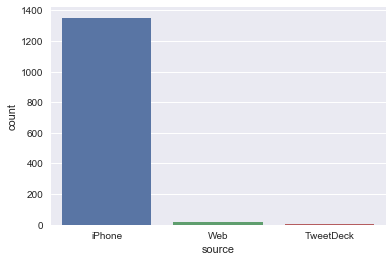

In [306]:
#Top sources
sns.countplot(x='source', data=clean_data_nooutliers)

Most tweets from this dataset com from iPhones

In [307]:
#compare ratings between sources
clean_data_nooutliers.groupby(['source'], as_index=False)['rating'].mean()

,source,rating
0,TweetDeck,110.00000
1,Web,105.00000
2,iPhone,107.08564


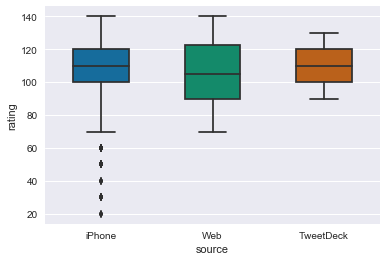

In [308]:
#boxplot for source data & ratings
bplot = sns.boxplot(y='rating', x='source', 
                 data=clean_data_nooutliers, 
                 width=0.5,
                 palette="colorblind")

iPhone ratings seem to have more outliers than other sources. The mean rating for each group falls between 105-110. Most tweets in this sample come from iphones. Ratings from TweetDeck sources have the smallest range of ratings.

In [309]:
clean_data_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 1377
Data columns (total 26 columns):
tweet_id              1375 non-null int64
timestamp             1375 non-null datetime64[ns]
source                1375 non-null object
text                  1375 non-null object
expanded_urls         1375 non-null object
rating_numerator      1375 non-null float64
rating_denominator    1375 non-null int64
name                  1375 non-null object
doggo                 1375 non-null int64
floofer               1375 non-null int64
pupper                1375 non-null int64
puppo                 1375 non-null int64
rating                1375 non-null float64
favorite_count        1375 non-null int64
retweet_count         1375 non-null int64
jpg_url               1375 non-null object
img_num               1375 non-null int64
p1                    1375 non-null object
p1_conf               1375 non-null float64
p1_dog                1375 non-null bool
p2                    1375 non-nu

In [310]:
#New dataframe to look at data where dog image predictions were true
dogs_only = clean_data_nooutliers[clean_data_nooutliers['p1_dog']==True]


In [311]:
#dogs with highest median ratings
dogs_only.groupby('p1')['rating'].mean().sort_values(ascending=False).head(15)

p1
Appenzeller           130.000000
Saluki                123.333333
Border_terrier        123.333333
briard                120.000000
standard_schnauzer    120.000000
Irish_setter          120.000000
silky_terrier         120.000000
Tibetan_mastiff       120.000000
bloodhound            118.000000
kelpie                117.777778
chow                  117.187500
Cardigan              117.142857
golden_retriever      116.451613
basset                116.000000
Pembroke              115.781250
Name: rating, dtype: float64

The Appenzeller breed has the highest rating.          

In [312]:
#Check which dogs have most ratings
dogs_only['p1'].value_counts().head(30)

golden_retriever                  93
Labrador_retriever                66
Pembroke                          64
Chihuahua                         59
pug                               40
chow                              32
toy_poodle                        28
Pomeranian                        25
Samoyed                           23
French_bulldog                    22
malamute                          22
cocker_spaniel                    19
Siberian_husky                    19
Chesapeake_Bay_retriever          17
miniature_pinscher                16
Staffordshire_bullterrier         16
Shih-Tzu                          15
Shetland_sheepdog                 14
Cardigan                          14
German_shepherd                   14
beagle                            13
Eskimo_dog                        12
Pekinese                          11
Italian_greyhound                 11
Old_English_sheepdog              11
vizsla                            10
American_Staffordshire_terrier    10
B

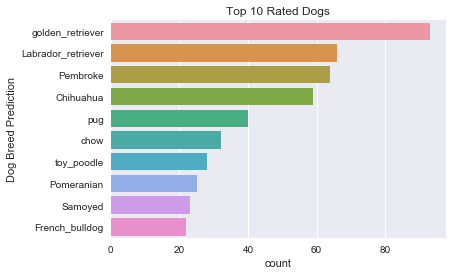

In [313]:
#visualization of dogs with most ratings
ax = sns.countplot(y="p1", data=dogs_only,
              order=dogs_only.p1.value_counts().iloc[:10].index)

ax.set_title('Top 10 Rated Dogs')
ax.set_ylabel('Dog Breed Prediction')

golden_retriever & Labrador_retriever and labs have the most ratings. 

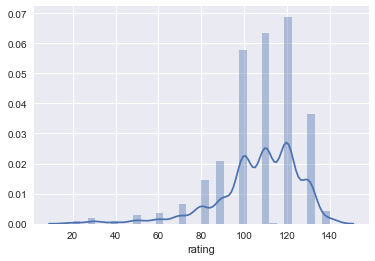

In [314]:
# Ratings distribution
sns.distplot( clean_data_nooutliers["rating"] )
#sns.plt.show()

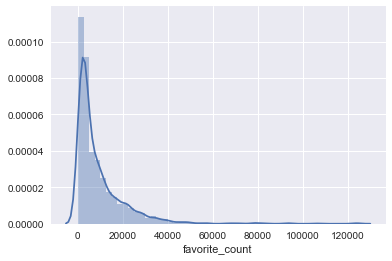

In [315]:
# Ratings distribution
sns.distplot( clean_data_nooutliers["favorite_count"] )
#sns.plt.show()

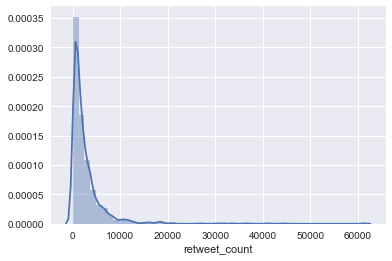

In [316]:
# Ratings distribution
sns.distplot( clean_data_nooutliers["retweet_count"] )
#sns.plt.show()

In [317]:
clean_data_nooutliers['retweet_count_log'] = np.log(clean_data_nooutliers['retweet_count'])
clean_data_nooutliers['favorite_count_log'] = np.log(clean_data_nooutliers['favorite_count'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The ratings variable has a normal distribution, but retweets and favorites are not. To normalize I will do a log transformation.

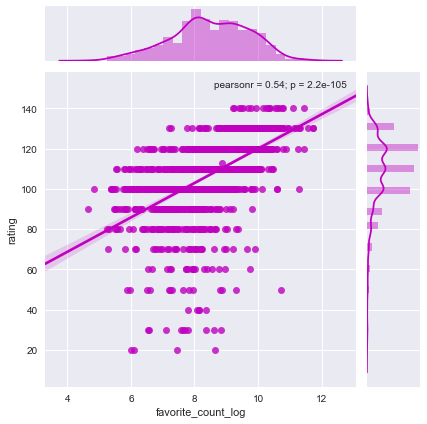

In [335]:
#spearman r
sns.jointplot(x="favorite_count_log", y="rating", data=clean_data_nooutliers, kind="reg",color="m")

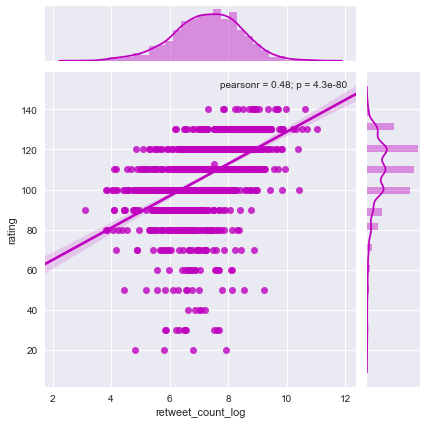

In [319]:
sns.jointplot(x="retweet_count_log", y="rating", data=clean_data_nooutliers, kind="reg",color="m");

In [320]:
#dogs average rating
dogs_only.groupby('p1')['rating'].mean().sort_values(ascending=False).head(30)

p1
Appenzeller                130.000000
Saluki                     123.333333
Border_terrier             123.333333
briard                     120.000000
standard_schnauzer         120.000000
Irish_setter               120.000000
silky_terrier              120.000000
Tibetan_mastiff            120.000000
bloodhound                 118.000000
kelpie                     117.777778
chow                       117.187500
Cardigan                   117.142857
golden_retriever           116.451613
basset                     116.000000
Pembroke                   115.781250
Great_Pyrenees             115.555556
Irish_terrier              115.000000
Australian_terrier         115.000000
komondor                   115.000000
giant_schnauzer            115.000000
Eskimo_dog                 115.000000
wire-haired_fox_terrier    115.000000
Samoyed                    114.782609
cocker_spaniel             114.736842
French_bulldog             114.545455
Irish_water_spaniel        113.333333
Weimarane

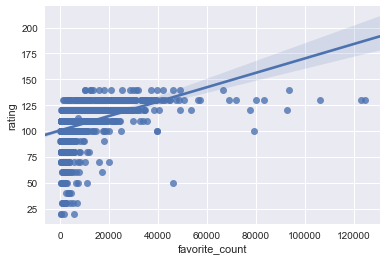

In [321]:
#correlation between fav count and rating
sns.regplot(x="favorite_count", y="rating", data=clean_data_nooutliers);

In [322]:
#Check which dogs had the highest confidence prediction
dogs_only.groupby('p1')['p1_conf'].mean().sort_values(ascending=False).head(30)

p1
komondor                          0.958819
clumber                           0.946718
Tibetan_mastiff                   0.936126
Brittany_spaniel                  0.898093
keeshond                          0.844431
bull_mastiff                      0.833571
Bernese_mountain_dog              0.818558
Samoyed                           0.813365
French_bulldog                    0.794745
Pomeranian                        0.773691
Leonberg                          0.766436
German_shepherd                   0.760744
German_short-haired_pointer       0.758715
pug                               0.758130
vizsla                            0.752500
golden_retriever                  0.729261
Doberman                          0.724541
Pembroke                          0.720005
basset                            0.716427
Saint_Bernard                     0.714350
Blenheim_spaniel                  0.676567
Norwegian_elkhound                0.667562
boxer                             0.665137
flat-coa

In [323]:
#top 5 dogs with most favs count
dogs_only.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(5)

p1
golden_retriever      1251165
Labrador_retriever     731526
Pembroke               711934
Chihuahua              553114
French_bulldog         453507
Name: favorite_count, dtype: int64

In [324]:
#top 5 dogs with most rt count
dogs_only.groupby('p1')['retweet_count'].sum().sort_values(ascending=False).head(5)

p1
golden_retriever      352129
Labrador_retriever    199411
Pembroke              195367
Chihuahua             175142
French_bulldog        117018
Name: retweet_count, dtype: int64

The neural net predictions suggests there are several images of these two popular breeds: golden_retriever & Labrador_retriever. They also have the most retweets and favorite counts.   

Not really seeing any corrleation between ratings and favorite count

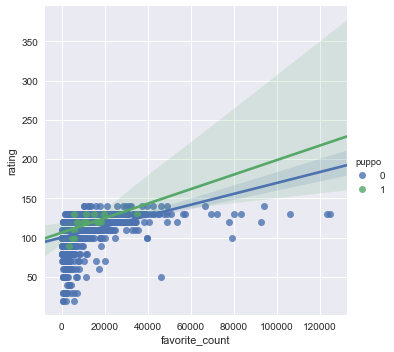

In [325]:
sns.lmplot(x="favorite_count", y="rating", hue="puppo", data=clean_data_nooutliers);

In [326]:
#percentage of rows that claim image was indeed a dog
clean_data_nooutliers['p1_dog'].value_counts(normalize=True)

True     0.770182
False    0.229818
Name: p1_dog, dtype: float64

The neural net's first prediction says that most images are actual images of dogs

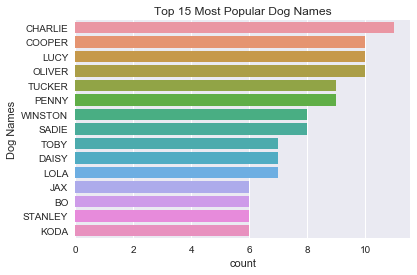

In [327]:
#visualization top dog names
ax3 = sns.countplot(y="name", data=clean_data_nooutliers,
              order=clean_data_nooutliers.name.value_counts().iloc[:15].index)

ax3.set_title('Top 15 Most Popular Dog Names')
ax3.set_ylabel('Dog Names')

In [328]:
#tweets with most fav

pd.options.display.max_colwidth=5000

clean_data_nooutliers.favorite_count.max()

clean_data_nooutliers[clean_data_nooutliers['favorite_count']==124548]

print(clean_data_nooutliers[clean_data_nooutliers['favorite_count']==124548].p1)


87    French_bulldog
Name: p1, dtype: object


In [329]:
clean_data_nooutliers.retweet_count.max()
clean_data_nooutliers[clean_data_nooutliers['retweet_count']==61210]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count_log,favorite_count_log
322,807106840509214720,2016-12-09 06:17:20,iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10,STEPHAN,0,0,...,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,11.022066,11.72098


Tweet with most fav, Jamsey with a 13/10 rating
https://twitter.com/dog_rates/status/866450705531457537/photo/1

Most retweets
https://twitter.com/dog_rates/status/807106840509214720/video/1